In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**1. Load and display the satellite image**

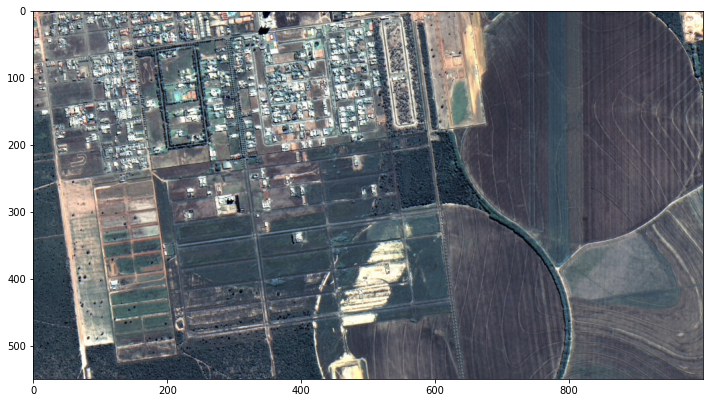

In [3]:
train_image = cv2.imread('/gdrive/My Drive/master_course_work/images/place_all.jpg')
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(train_image)

**2. Load and display the quadcopter image**

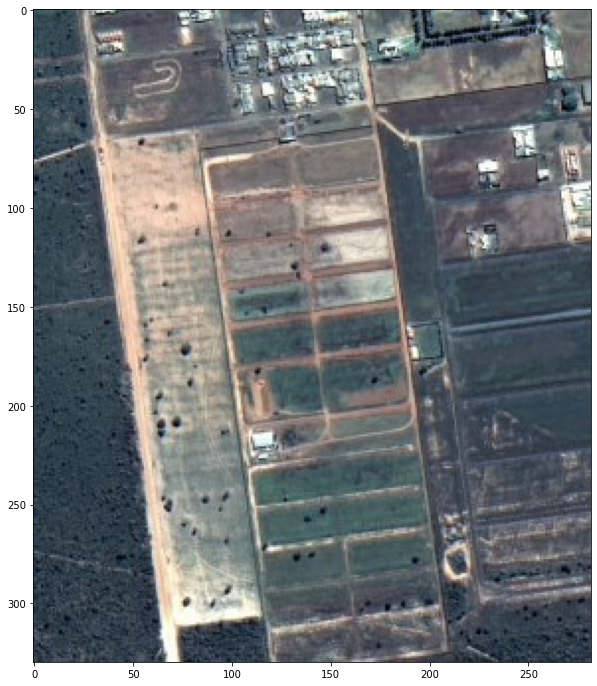

In [4]:
test_image = cv2.imread('/gdrive/My Drive/master_course_work/images/place_1.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(test_image)

In [5]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

**SURF**

In [6]:
orb2 = cv2.xfeatures2d_SURF.create()  #xfeatures2d_SIFT.create()

kp1, des1 = orb2.detectAndCompute(train_image, None)
kp2, des2 = orb2.detectAndCompute(test_image, None)

In [15]:
len(kp1), len(kp2)

(5731, 1109)

In [47]:
bf = cv2.BFMatcher()
mathes = bf.knnMatch(des1, des2, k=2)

In [56]:
good = []

for m,n in mathes:
    if m.distance < 0.5*n.distance:
        good.append([m])

In [59]:
img3 = cv2.drawMatchesKnn(train_image, kp1, test_image, kp2, good[:30], None, matchColor=(255, 0, 0), matchesMask=None,
                              singlePointColor=(0, 0, 255), flags=0)

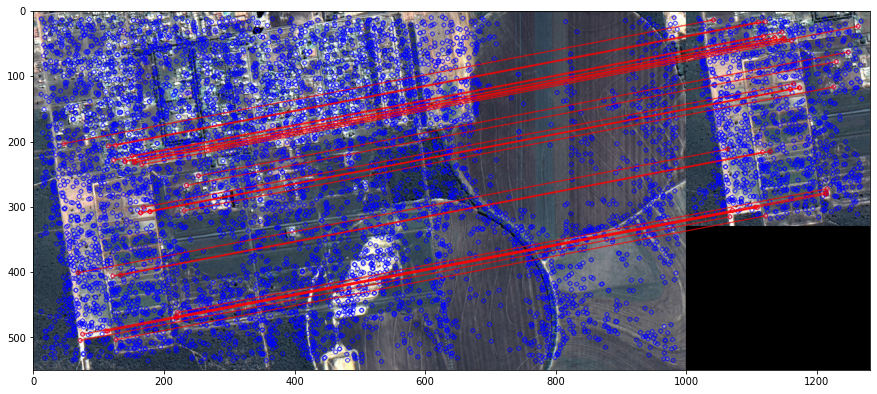

In [60]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.imshow(img3)
plt.show()

In [61]:
img4 = cv2.drawMatchesKnn(train_image, kp1, test_image, kp2, good[:30], None, matchColor=(255, 0, 0), matchesMask=None,
                              singlePointColor=(0, 0, 255), flags=2)

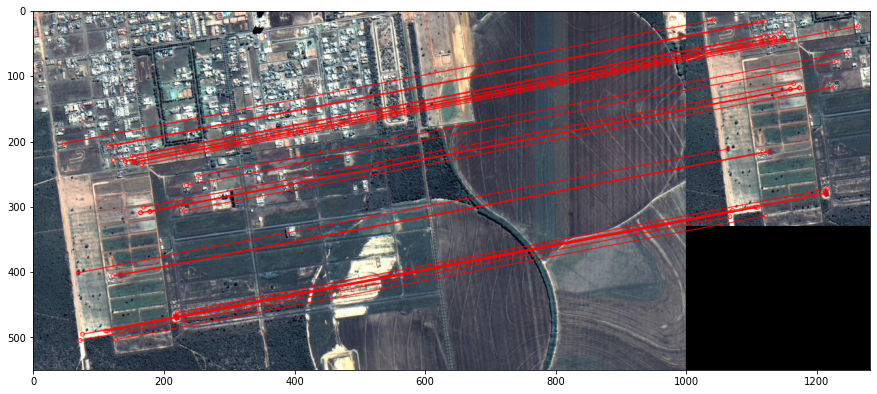

In [62]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.imshow(img4)
plt.show()